# Heart Disease UCI

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("input/heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.shape

(303, 14)

## Pandas Profiling

In [9]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [10]:
profile

In [11]:
profile.to_file(output_file="output/report.html")

In [12]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [13]:
df.shape

(303, 14)

In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [16]:
y_train.value_counts()

1    115
0     97
Name: target, dtype: int64

In [17]:
y_test.value_counts()

1    50
0    41
Name: target, dtype: int64

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

model = GaussianNB()
kfold = model_selection.KFold(n_splits=2)
results = model_selection.cross_val_score(model,
                                          X_train, y_train,
                                          cv= kfold)
print("Results:", results)
print("Mean Result:", results.mean())

Results: [0.79245283 0.82075472]
Mean Result: 0.8066037735849056


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

model = GaussianNB()
kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(model,
                                          X_train, y_train,
                                          cv= kfold)
print("Results:", results)
print("Mean Result:", results.mean())

Results: [0.88372093 0.69767442 0.71428571 0.73809524 0.88095238]
Mean Result: 0.7829457364341086


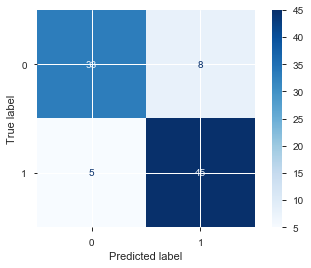

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [25]:
# Bagging Classifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(SVC())

kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model,
                                          X_train, y_train,
                                          cv= kfold)
print("Results:", results)
print("Mean Result:", results.mean())

Results: [0.63636364 0.63636364 0.66666667 0.57142857 0.57142857 0.66666667
 0.57142857 0.61904762 0.71428571 0.66666667]
Mean Result: 0.6320346320346321


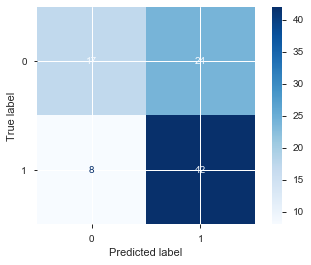

In [26]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [27]:
# Voting Ensemble for Classification
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

model = VotingClassifier(estimators)

kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model,
                                          X_train, y_train,
                                          cv= kfold)
print("Results:", results)
print("Mean Result:", results.mean())

Results: [0.77272727 0.90909091 0.76190476 0.57142857 0.76190476 0.80952381
 0.76190476 0.85714286 0.76190476 0.85714286]
Mean Result: 0.7824675324675324


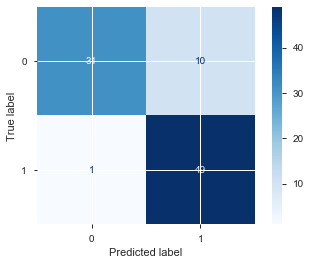

In [28]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [29]:
# AdaBoost Classification
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 10
kfold = model_selection.KFold(n_splits=5, 
                              random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model,
                                          X_train, y_train,
                                          cv= kfold)
print("Results:", results)
print("Mean Result:", results.mean())

Results: [0.79069767 0.76744186 0.85714286 0.80952381 0.80952381]
Mean Result: 0.8068660022148395


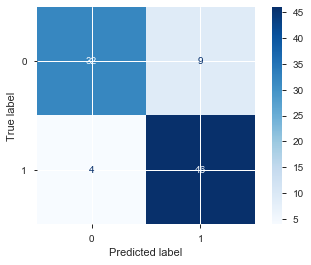

In [30]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [31]:
# Random Forest Classification
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 500
max_features = 3
kfold = model_selection.KFold(n_splits=10, 
                              random_state=seed)

model = RandomForestClassifier(n_estimators=num_trees, 
                               max_features=max_features)
results = model_selection.cross_val_score(model,
                                          X_train, y_train,
                                          cv= kfold)
print("Results:", results)
print("Mean Result:", results.mean())

Results: [0.81818182 0.77272727 0.85714286 0.71428571 0.85714286 0.76190476
 0.66666667 0.9047619  0.80952381 0.9047619 ]
Mean Result: 0.8067099567099566


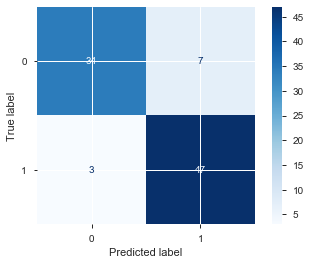

In [32]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)

In [33]:
dict(zip(X_train, model.feature_importances_))

{'age': 0.0874198821730082,
 'sex': 0.03384527981905622,
 'cp': 0.12141858822013452,
 'trestbps': 0.081827411383024,
 'chol': 0.08673185333495527,
 'fbs': 0.012861936123208101,
 'restecg': 0.02638502608503281,
 'thalach': 0.12378289899242775,
 'exang': 0.06064752314890023,
 'oldpeak': 0.10510831759150971,
 'slope': 0.055711058744295425,
 'ca': 0.10767690919595486,
 'thal': 0.096583315188493}

In [34]:
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier()
model.fit(X_train, y_train)
select_f = SelectFromModel(model, prefit=True)
list(zip(X_train, 
         model.feature_importances_, 
         select_f.get_support()))

[('age', 0.09028591867331885, True),
 ('sex', 0.037216925527262, False),
 ('cp', 0.12463050053560916, True),
 ('trestbps', 0.07825156010384855, True),
 ('chol', 0.08021311206568622, True),
 ('fbs', 0.01259507093596768, False),
 ('restecg', 0.028317869522528412, False),
 ('thalach', 0.12626509779509654, True),
 ('exang', 0.06640180640098546, False),
 ('oldpeak', 0.10345486401996856, True),
 ('slope', 0.04721333449308863, False),
 ('ca', 0.10295715938847437, True),
 ('thal', 0.10219678053816553, True)]

In [35]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('FeatureSelection', SelectFromModel(RandomForestClassifier())),
                 ('Model', RandomForestClassifier())], verbose=True)
pipe.fit(X_train, y_train)

[Pipeline] .. (step 1 of 2) Processing FeatureSelection, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing Model, total=   0.2s


Pipeline(memory=None,
         steps=[('FeatureSelection',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,

In [36]:
list(zip(X_train.columns,
         pipe.steps[0][1].get_support()))

[('age', True),
 ('sex', False),
 ('cp', True),
 ('trestbps', True),
 ('chol', True),
 ('fbs', False),
 ('restecg', False),
 ('thalach', True),
 ('exang', False),
 ('oldpeak', True),
 ('slope', False),
 ('ca', True),
 ('thal', True)]

In [37]:
pipe.steps[1][1].feature_importances_

array([0.10845341, 0.14357977, 0.09517101, 0.10221653, 0.15823453,
       0.15100208, 0.13872122, 0.10262144])

In [38]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    "P_1" : [1,2,3],
    "P_2" : ["one", "two", "three"]
}

list(ParameterGrid(param_grid))

[{'P_1': 1, 'P_2': 'one'},
 {'P_1': 1, 'P_2': 'two'},
 {'P_1': 1, 'P_2': 'three'},
 {'P_1': 2, 'P_2': 'one'},
 {'P_1': 2, 'P_2': 'two'},
 {'P_1': 2, 'P_2': 'three'},
 {'P_1': 3, 'P_2': 'one'},
 {'P_1': 3, 'P_2': 'two'},
 {'P_1': 3, 'P_2': 'three'}]

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('FeatureSelection', SelectFromModel(RandomForestClassifier())),
                 ('Model', RandomForestClassifier())], verbose=True)

param_grid = {
    "Model__n_estimators" : [200, 300, 500],
    "Model__criterion" : ["gini", "entropy"]
}

model = GridSearchCV(pipe, param_grid, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.5s finished


[Pipeline] .. (step 1 of 2) Processing FeatureSelection, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing Model, total=   0.5s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('FeatureSelection',
                                        SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                                         ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=None,
                                                                                         max_features='auto',
                                                                                         max_leaf_nodes=None,
                                                                                         max_samples=None,


In [41]:
model.best_estimator_

Pipeline(memory=None,
         steps=[('FeatureSelection',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,

In [42]:
model.best_params_

{'Model__criterion': 'entropy', 'Model__n_estimators': 200}

In [43]:
model.cv_results_

{'mean_fit_time': array([1.55122809, 1.73871913, 2.76212063, 1.39704528, 1.85994549,
        2.29588499]),
 'std_fit_time': array([0.09416817, 0.03199254, 0.08906705, 0.06825153, 0.03008963,
        0.3316959 ]),
 'mean_score_time': array([0.07999725, 0.09650202, 0.14677162, 0.07143064, 0.10213909,
        0.1098897 ]),
 'std_score_time': array([0.01292165, 0.01047172, 0.00551729, 0.00342733, 0.0071169 ,
        0.0284233 ]),
 'param_Model__criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_Model__n_estimators': masked_array(data=[200, 300, 500, 200, 300, 500],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'Model__criterion': 'gini', 'Model__n_estimators': 200},
  {'Model__criterion': 'gini', 'Model__n_estimators': 300},
  {'Mo

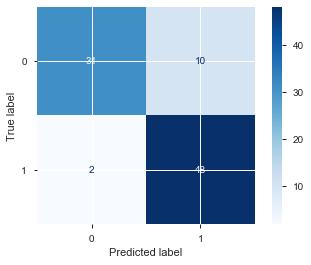

In [44]:
plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)

# Explainable AI

In [57]:
model = RandomForestClassifier(random_state=1)

In [58]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [59]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [60]:
dict(zip(X_train.columns, model.feature_importances_))

{'age': 0.09229073453516623,
 'sex': 0.038311742124640134,
 'cp': 0.13052422698798768,
 'trestbps': 0.07975783977155662,
 'chol': 0.09314992428519059,
 'fbs': 0.010879918597740365,
 'restecg': 0.02761069265568929,
 'thalach': 0.10997624532735338,
 'exang': 0.05705880288412493,
 'oldpeak': 0.10255505787847088,
 'slope': 0.06158501633051933,
 'ca': 0.09755881431375858,
 'thal': 0.09874098430780215}

In [61]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0462 ± 0.0164,thal
0.0440 ± 0.0197,ca
0.0440 ± 0.0393,cp
0.0286 ± 0.0298,thalach
0.0154 ± 0.0224,slope
0.0132 ± 0.0256,sex
0.0132 ± 0.0426,oldpeak
0.0132 ± 0.0088,chol
0.0110 ± 0.0139,exang
0.0066 ± 0.0298,age


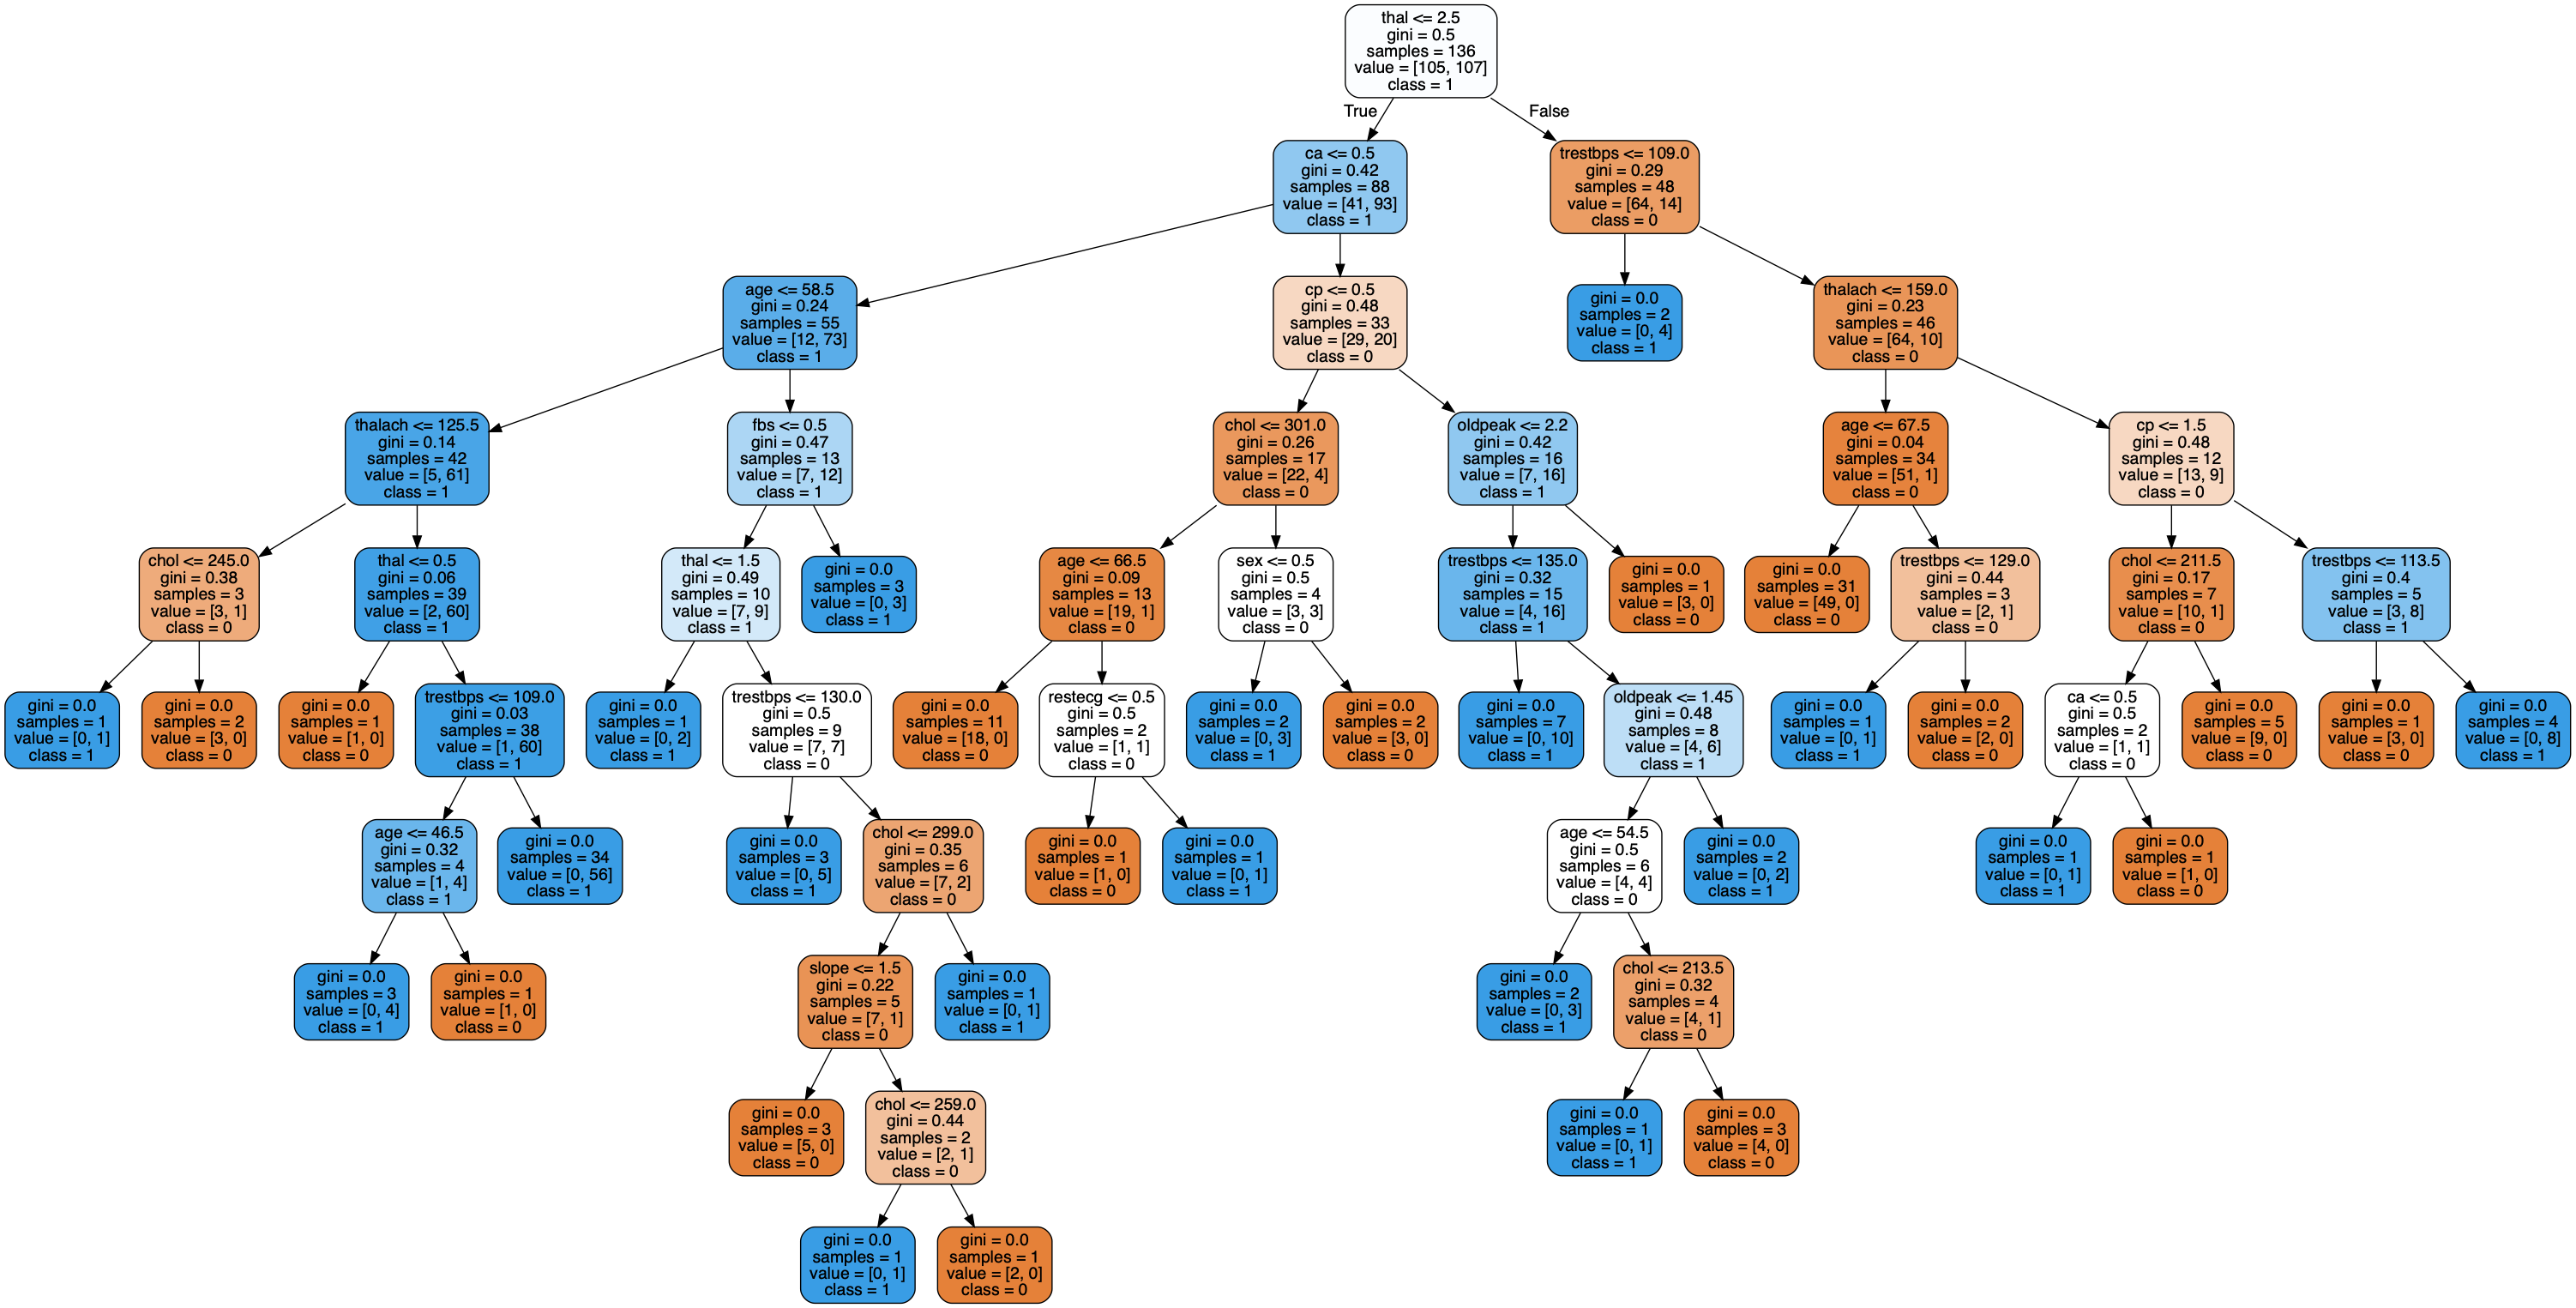

In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)
estimator = model.estimators_[4]

from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='output/tree.dot',
               feature_names=list(X_train.columns),
               class_names=["0", "1"], rounded=True, proportion=False,
               precision=2, filled=True)

from subprocess import call 
call(['dot', '-Tpng', 'output/tree.dot', '-o', 'output/tree.png', '-Gdpi=100'])

from IPython.display import Image
Image(filename='output/tree.png')

In [63]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# PDP

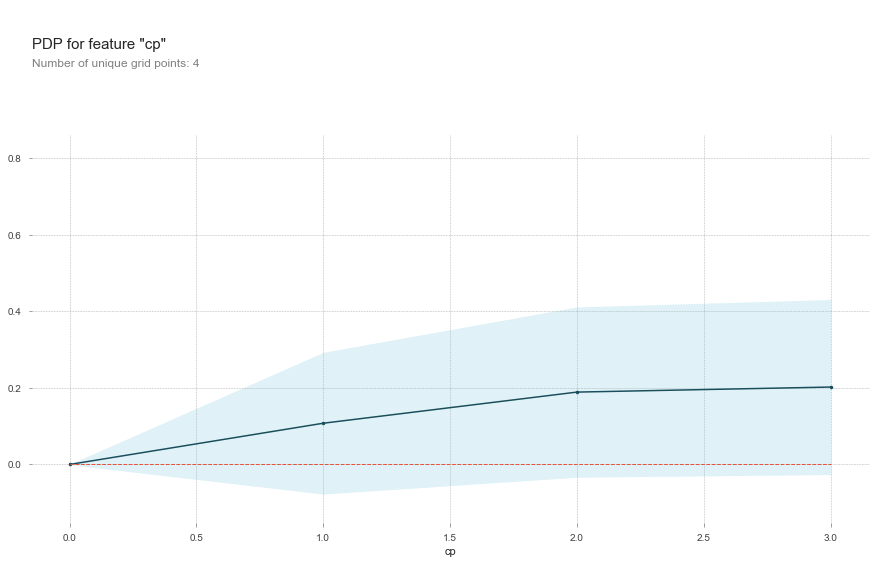

In [71]:
# Partial Plots
from pdpbox import pdp, info_plots

base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'cp'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, 
                           model_features=base_features, 
                           feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

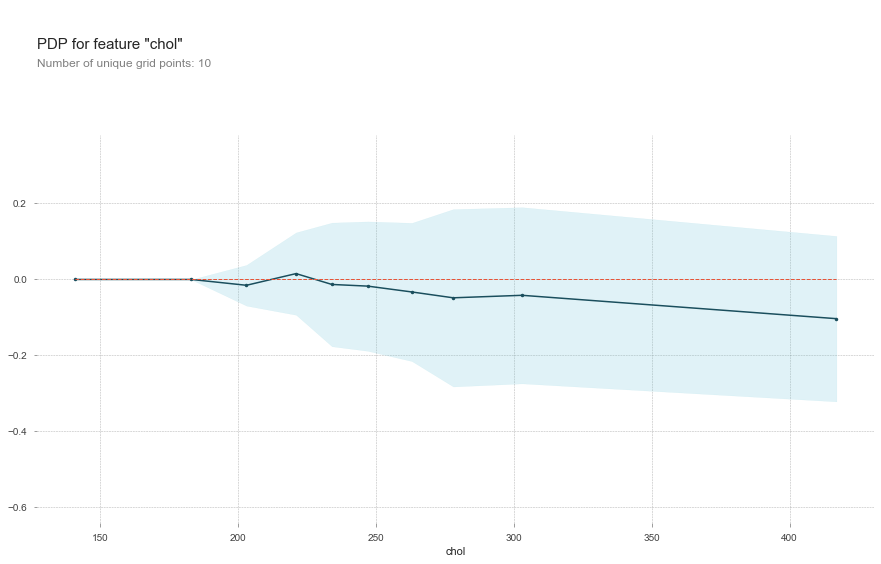

In [72]:
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots

base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'chol'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

# SHAP

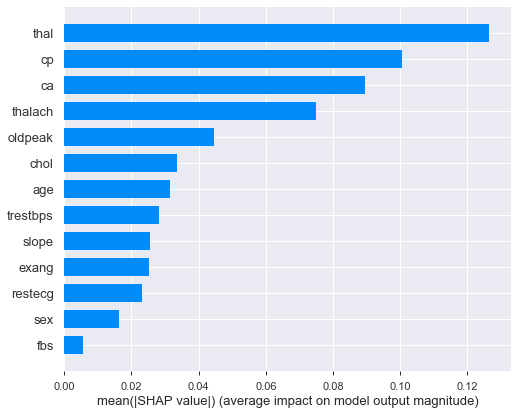

In [75]:
# SHAP values
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type='bar')

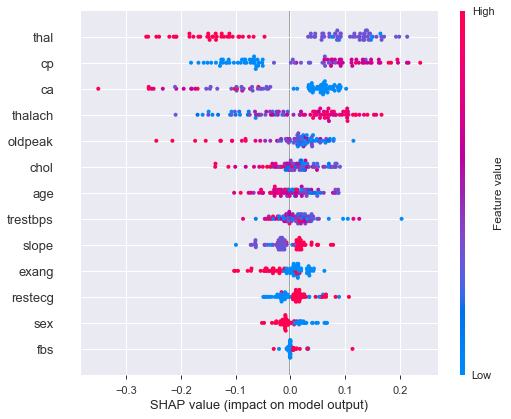

In [76]:
shap.summary_plot(shap_values[1], X_test)

In [77]:
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [83]:
data = X_test.iloc[1,:].astype(float)
print("Predicted Class Probability: ", model.predict_proba(X_test[:1]))
heart_disease_risk_factors(model, data)

Predicted Class Probability:  [[0.6 0.4]]


In [81]:
data = X_test.iloc[5:6].astype(float)
print("Predicted Class Probability: ", model.predict_proba(X_test[5:6]))
heart_disease_risk_factors(model, data)

Predicted Class Probability:  [[1. 0.]]
